In [91]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [92]:
df = pd.read_csv("Data_Original.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [93]:
#changing the name of some cloumns
df= df.rename(columns={'No-show': 'show','Hipertension': 'Hypertension', 'Handcap': 'Handicap'})

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  show            110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [95]:
df.PatientId = df.PatientId.astype('int')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int32 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hypertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handicap        110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  show            110527 non-null  object
dtypes: int32(1), int64(8), object(5)
memory usage: 11.4+ MB


In [97]:
# recency
# convert to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int32              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  show          

In [99]:
# number of days only
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df['AppointmentDay'] = df['AppointmentDay'].dt.date
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,show
0,-2147483648,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,-2147483648,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,-2147483648,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,-2147483648,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,-2147483648,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [100]:
df.show = df.show.map({'Yes': 0 , "No":1})   # yes means patient has not shown and no means patient was present 
# so with 0 it is that patient has not shown up and 1 means patient has shown up for the appointment

## # so with 0 it is that patient has not shown up and 1 means patient has shown up for the appointment

In [101]:
df.show.value_counts(normalize=True)

1    0.798067
0    0.201933
Name: show, dtype: float64

# We will deal with data imbalance after a while 

In [102]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,show
0,-2147483648,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,-2147483648,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,-2147483648,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,-2147483648,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,-2147483648,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [103]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [104]:
df.drop(["Neighbourhood", "PatientId", "AppointmentID"], axis=1, inplace=True)
df

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,show
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,1
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,1
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,1
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,1
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,1
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,1
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,1


In [105]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,show
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,1
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,1
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,1
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,1
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,1


In [106]:
dummy = pd.get_dummies(df.Gender)
dummy.drop('M',axis=1, inplace=True)
dummy = dummy.rename(columns={'F':"Gender_Female" })
dummy.value_counts()

Gender_Female
1                71840
0                38687
dtype: int64

In [107]:
df = pd.concat([df, dummy], axis= 1)
df.drop("Gender",axis=1, inplace=True)
df.head()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,show,Gender_Female
0,2016-04-29,2016-04-29,62,0,1,0,0,0,0,1,1
1,2016-04-29,2016-04-29,56,0,0,0,0,0,0,1,0
2,2016-04-29,2016-04-29,62,0,0,0,0,0,0,1,1
3,2016-04-29,2016-04-29,8,0,0,0,0,0,0,1,1
4,2016-04-29,2016-04-29,56,0,1,1,0,0,0,1,1


In [108]:
df.Age.quantile([0.01,0.9999])

0.0100     0.0000
0.9999    98.9474
Name: Age, dtype: float64

In [109]:
df =  df[(df.Age > 0) & (df.Age < 102)]

In [110]:
import plotly.express as px
px.box(df,  y=df.Age )


In [111]:
df.head()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,show,Gender_Female
0,2016-04-29,2016-04-29,62,0,1,0,0,0,0,1,1
1,2016-04-29,2016-04-29,56,0,0,0,0,0,0,1,0
2,2016-04-29,2016-04-29,62,0,0,0,0,0,0,1,1
3,2016-04-29,2016-04-29,8,0,0,0,0,0,0,1,1
4,2016-04-29,2016-04-29,56,0,1,1,0,0,0,1,1


### Creating new column with the difference between days of ScheduleDay and Appointment day 

In [112]:
diff = df.AppointmentDay - df.ScheduledDay

In [113]:
diff = diff.dt.days

In [116]:
diff.describe()

count    106980.000000
mean         10.166816
std          15.263647
min          -6.000000
25%           0.000000
50%           4.000000
75%          14.000000
max         179.000000
dtype: float64

### Here the outliers will be fixed while using standard scaler for scaling the data variable

In [125]:
df.drop(["AppointmentDay", "ScheduledDay"], axis= 1, inplace=True)
df.head()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,show,Gender_Female
0,62,0,1,0,0,0,0,1,1
1,56,0,0,0,0,0,0,1,0
2,62,0,0,0,0,0,0,1,1
3,8,0,0,0,0,0,0,1,1
4,56,0,1,1,0,0,0,1,1


In [126]:
df = pd.concat([diff, df], axis=1)


,0,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,show,Gender_Female
0,0,62,0,1,0,0,0,0,1,1
1,0,56,0,0,0,0,0,0,1,0
2,0,62,0,0,0,0,0,0,1,1
3,0,8,0,0,0,0,0,0,1,1
4,0,56,0,1,1,0,0,0,1,1


In [130]:
df  = df.rename(columns={0:"showUp_diff"})
df.tail()

,showUp_diff,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,show,Gender_Female
110522,35,56,0,0,0,0,0,1,1,1
110523,35,51,0,0,0,0,0,1,1,1
110524,41,21,0,0,0,0,0,1,1,1
110525,41,38,0,0,0,0,0,1,1,1
110526,41,54,0,0,0,0,0,1,1,1


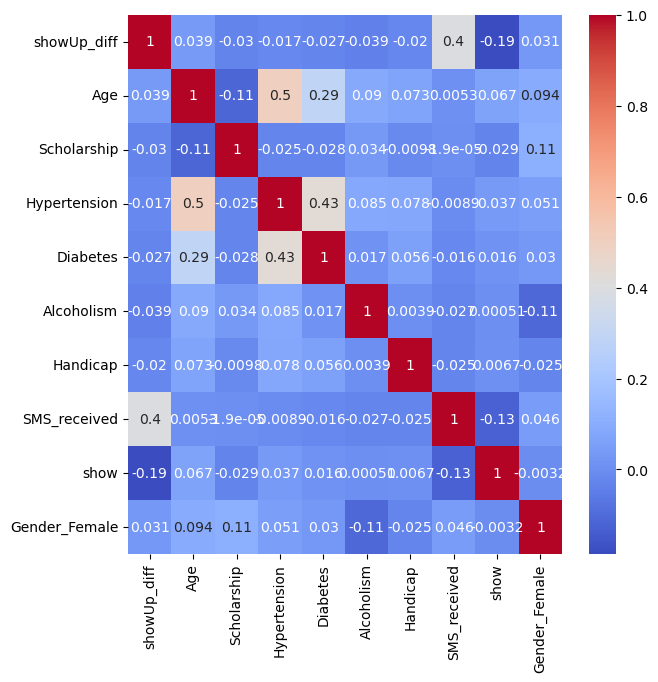

In [162]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")
plt.show()

In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["showUp_diff","Age"]] = scaler.fit_transform(df[["showUp_diff","Age"]])

In [177]:
df.head()

,showUp_diff,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,show,Gender_Female
0,-0.666084,1.054751,0,1,0,0,0,0,1,1
1,-0.666084,0.787598,0,0,0,0,0,0,1,0
2,-0.666084,1.054751,0,0,0,0,0,0,1,1
3,-0.666084,-1.349626,0,0,0,0,0,0,1,1
4,-0.666084,0.787598,0,1,1,0,0,0,1,1


### First we will make a model then we will be thinking about class imbalance

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106980 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   showUp_diff    106980 non-null  float64
 1   Age            106980 non-null  float64
 2   Scholarship    106980 non-null  int64  
 3   Hypertension   106980 non-null  int64  
 4   Diabetes       106980 non-null  int64  
 5   Alcoholism     106980 non-null  int64  
 6   Handicap       106980 non-null  int64  
 7   SMS_received   106980 non-null  int64  
 8   show           106980 non-null  int64  
 9   Gender_Female  106980 non-null  uint8  
dtypes: float64(2), int64(7), uint8(1)
memory usage: 12.3 MB


In [208]:
df.iloc[:,[9]]

,Gender_Female
0,1
1,0
2,1
3,1
4,1
...,...
110522,1
110523,1
110524,1
110525,1


In [211]:
md = pd.concat([df.iloc[:,:8] , df.iloc[:,[9]],df.show],axis=1) 
md

,showUp_diff,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender_Female,show
0,-0.666084,1.054751,0,1,0,0,0,0,1,1
1,-0.666084,0.787598,0,0,0,0,0,0,0,1
2,-0.666084,1.054751,0,0,0,0,0,0,1,1
3,-0.666084,-1.349626,0,0,0,0,0,0,1,1
4,-0.666084,0.787598,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
110522,1.626957,0.787598,0,0,0,0,0,1,1,1
110523,1.626957,0.564970,0,0,0,0,0,1,1,1
110524,2.020050,-0.770795,0,0,0,0,0,1,1,1
110525,2.020050,-0.013861,0,0,0,0,0,1,1,1


In [212]:
df.to_csv("Data_processed.csv")